In [1]:
# import all plotting packages
%matplotlib nbagg
import matplotlib.pyplot as plt
from matplotlib import colors, cm

# importing system packages
import os
import sys
import h5py
import time
import itertools

# importing the workhorse
import numpy as np
import pandas as pd

# tiff packages
from PIL import Image
import tifffile

# for the fitting procedures
from lmfit import *

In [2]:
folder = '/xfel/ffs/dat/ue_191123_FXS/reduced'

### Load data

In [3]:
fpath = os.path.join(folder, 'BG_r'+str(1).zfill(3)+'.tif')
bgImg_r001 = tifffile.imread(fpath)

In [4]:
fpath = os.path.join(folder, 'BG_r'+str(15).zfill(3)+'.tif')
bgImg_r015 = tifffile.imread(fpath)

<IPython.core.display.Javascript object>


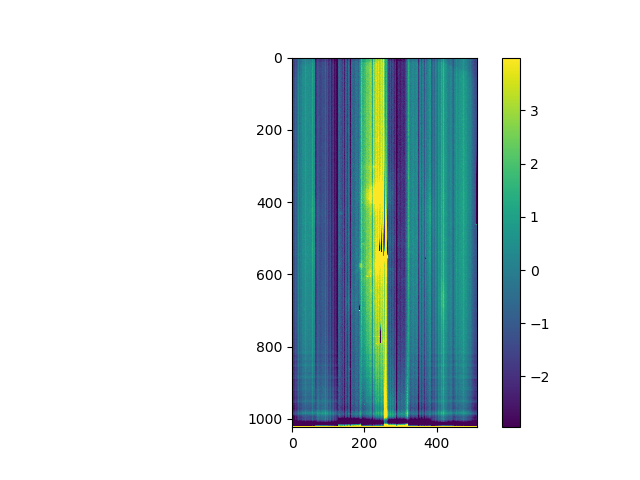

In [5]:
plt.figure()
plt.imshow(bgImg_r015, vmin=np.nanpercentile(bgImg_r015, 2), vmax=np.nanpercentile(bgImg_r015, 98))
plt.colorbar()

### Histogram

<IPython.core.display.Javascript object>


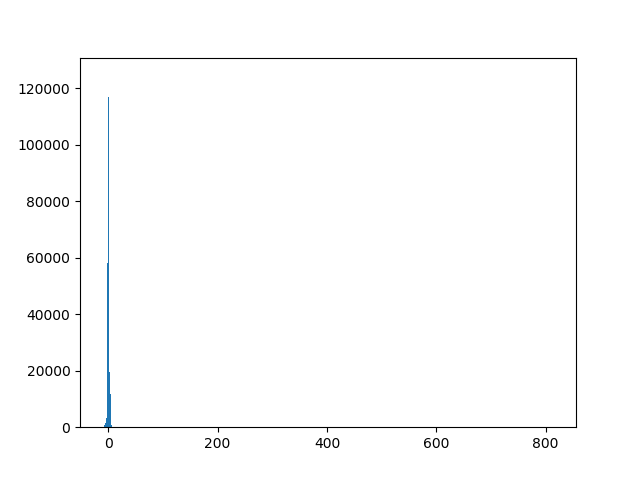

In [6]:
plt.figure()
_ = plt.hist(bgImg_r015.flatten(), bins=1000)

### Comparison BGs taken over 2 days

<IPython.core.display.Javascript object>


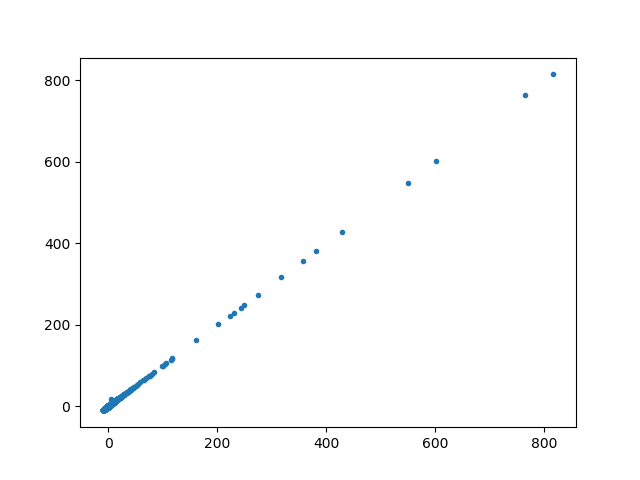

In [7]:
plt.figure()
plt.clf()
plt.plot(bgImg_r001.flatten(), bgImg_r015.flatten(), '.')

### How to remove background

In [8]:
dpath = os.path.abspath('/xfel/ffs/dat/ue_191123_FXS/reduced/r008/run008_off_p0001_s001.tif')
dtiff = tifffile.imread(dpath)

dshots = os.path.abspath('/xfel/ffs/dat/ue_191123_FXS/reduced/r008/run008_off_s001.csv')
temp = pd.read_csv(dshots, index_col=0)
numshots = temp['shots'].iloc[0]

<IPython.core.display.Javascript object>


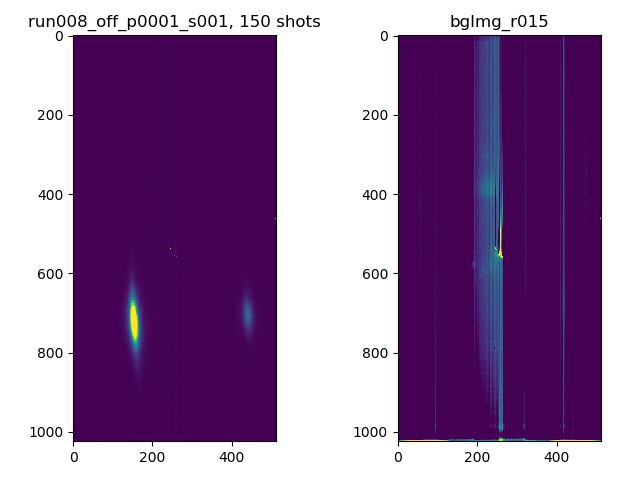

In [9]:
plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(dtiff, vmin=150, vmax=100000)
ax1.set_title('run008_off_p0001_s001, {} shots'.format(numshots))

ax2 = plt.subplot(122)
ax2.imshow(bgImg_r015, vmin=1, vmax=10)
ax2.set_title('bgImg_r015')

plt.tight_layout()

<IPython.core.display.Javascript object>


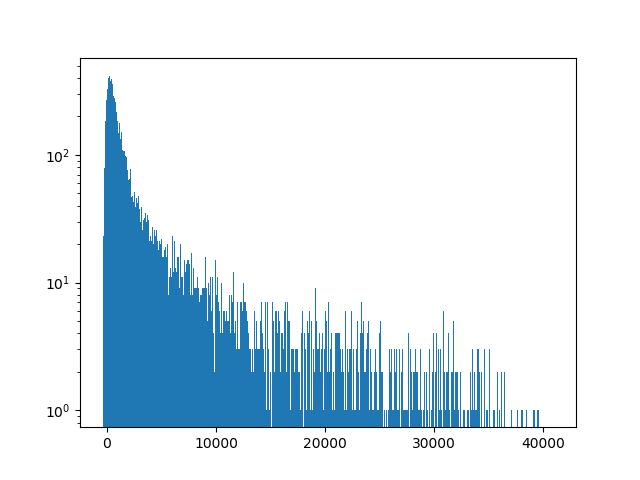

In [10]:
plt.figure()
_ = plt.hist(dtiff[625:800, 375:475].flatten(), bins=1000, log=True)

<IPython.core.display.Javascript object>


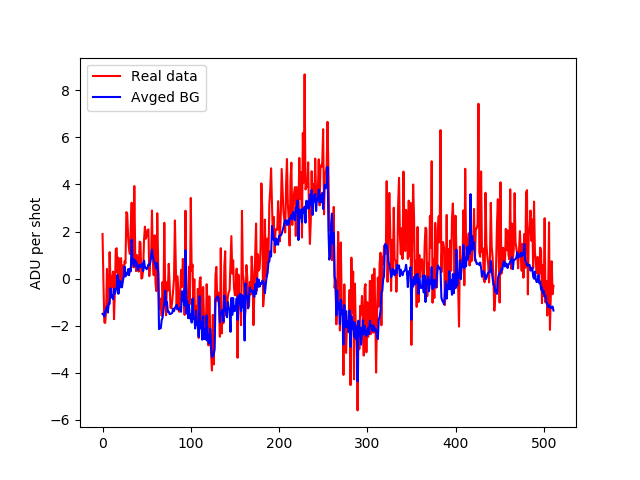

Text(0, 0.5, 'ADU per shot')

In [11]:
plt.figure()
plt.plot(dtiff[100]/numshots, 'r-', label='Real data')
plt.plot(bgImg_r015[100], 'b-', label='Avged BG')
plt.legend()
plt.ylabel('ADU per shot')

<IPython.core.display.Javascript object>


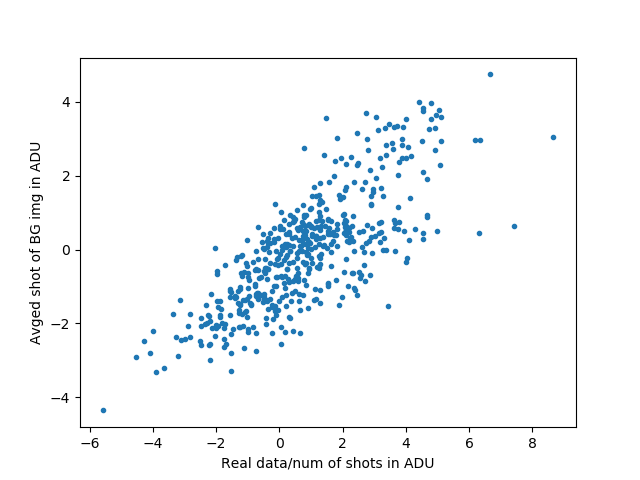

Text(0, 0.5, 'Avged shot of BG img in ADU')

In [12]:
plt.figure()
plt.plot(dtiff[100]/numshots, bgImg_r015[100], '.')
plt.xlabel('Real data/num of shots in ADU')
plt.ylabel('Avged shot of BG img in ADU')

<IPython.core.display.Javascript object>


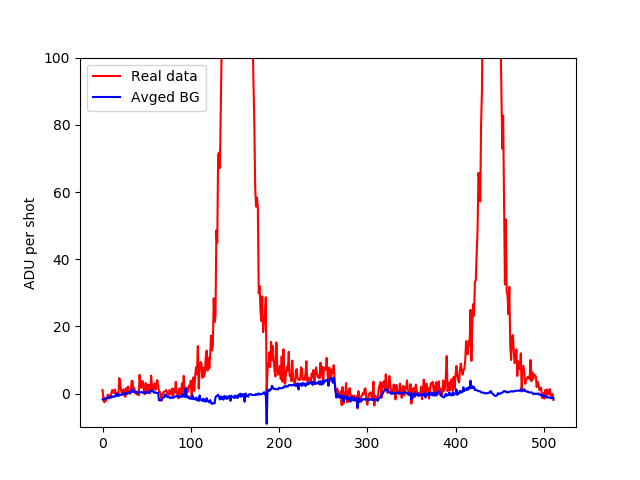

(-10, 100)

In [13]:
plt.figure()
plt.plot(dtiff[700]/numshots, 'r-', label='Real data')
plt.plot(bgImg_r015[700], 'b-', label='Avged BG')
plt.legend()
plt.ylabel('ADU per shot')
plt.ylim([-10, 100])